  ####   <center> ZTH COHORT 7.0 FINAL PROJECT 1 Nyong Godwill Nkwain</center> 
  ##### <center>Project 1: Thyroid Cancer Recurrence Detection Model</center>

##### 1. Importing  libraries

In [894]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;
# machine learning imports
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;
from sklearn.model_selection import GridSearchCV;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.metrics import accuracy_score;
from sklearn.metrics import f1_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import confusion_matrix;

In [895]:
## Loading our data set
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


## Objective

Develop a machine learning model to predict the recurrence of well-differentiated thyroid cancer based on clinicopathologic features.

## About Dataset

### Context
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

## Potential Benefits
• Identify patients at higher risk of recurrence, enabling early interventions and more effective treatments.
• Determine Factors responsible for thyroid cancer recurrence.
• Improve the management of hospital resources by focusing attention on patients with a higher likelihood of recurrence.
• Assist doctors in clinical decision-making by providing insights into individual recurrence risk for patients

### Column Descriptions:

1. Age: The age of the patient at the time of diagnosis or treatment.
2. Gender: The gender of the patient (male or female).
3. Smoking: Whether the patient is a smoker or not.
4. Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
5. Hx Radiotherapy: History of radiotherapy treatment for any condition.
6. Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
7. Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
8. Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
9. Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
10. Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
11. Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
13. T: Tumor classification based on its size and extent of invasion into nearby structures.
14. N: Nodal classification indicating the involvement of lymph nodes.
15. M: Metastasis classification indicating the presence or absence of distant metastases.
16. Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
17. Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
18. Recurred: Indicates whether the cancer has recurred after initial treatment.

In [896]:
# over view of our columns and datatypes
df.info()

#checking size of our data set
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

(383, 17)

In [897]:
#checking for null values in a our data set
df.isnull().sum()


Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [898]:
df.describe(include=['object'])

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [899]:
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

<h4> Convert data types to proper format</h4>

In [900]:
## function to convert categorical variable to numerical.
def category_numeric(x):
    if x =='Yes':
        return 1
    elif x == 'No':
        return 0
    
## Converting our target variable to numeric variables we have:
## Here we defined our Yes (Recurred) = 1 and our NO (Not Recurred) = 0 for our target variable

df['Recurred'] = df['Recurred'].apply(category_numeric)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1


In [901]:
df['Focality'].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

<h4>Visualized our target variable with featured variables</h4>
1. Binning.
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

<b>Example: </b>
<p>In your data set, "Age" is a real valued variable ranging from 15 to 82 and it has 65 unique values.</p>
<p>Use the Pandas method 'cut' to segment the 'Age' column into 3 bins.</p> 


In [902]:
# # Defining the number of bins
# bins = np.linspace(min(df["Age"]), max(df["Age"]), 4)
# bins

In [903]:
# # setting group names
# group_names = ['Youths', 'Adult', 'Old']

In [904]:
# # Apply the function "cut" to determine what each value of `df['Age']` belongs to. 
# df['Age-binned'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True )
# df[['Age','Age-binned']].head(20)


### Visualizing our target variable with other features 

<Axes: xlabel='Gender', ylabel='Recurred'>

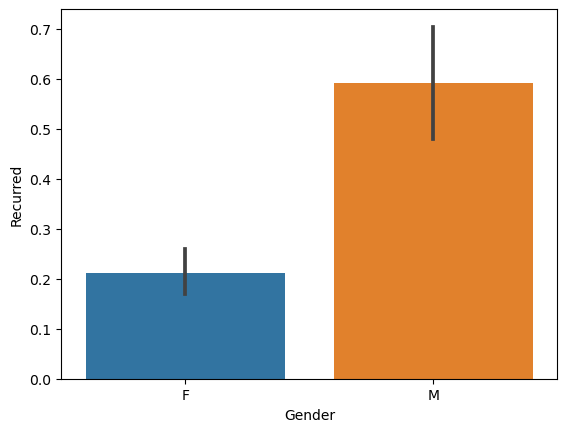

In [905]:
# Gender vs Recurred 

sns.barplot(x=df['Gender'], y= df['Recurred'], data=df)

- From the plot thyroid cancer mostly found in males and less in females

<Axes: xlabel='Smoking', ylabel='Recurred'>

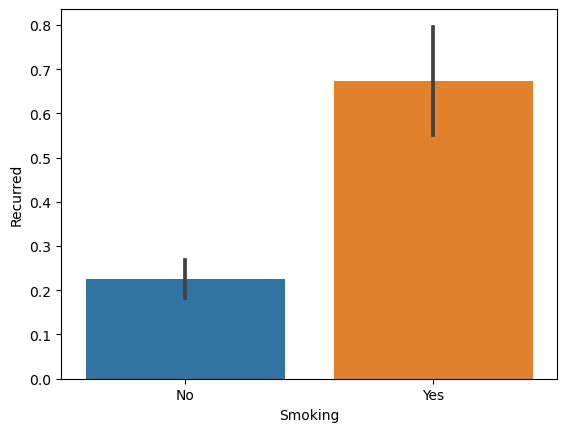

In [906]:
# Smoking vs Recurred 
sns.barplot(x=df['Smoking'], y= df['Recurred'])

- From the plot thyroid cancer mostly affects smokers

<Axes: xlabel='Hx Smoking', ylabel='Recurred'>

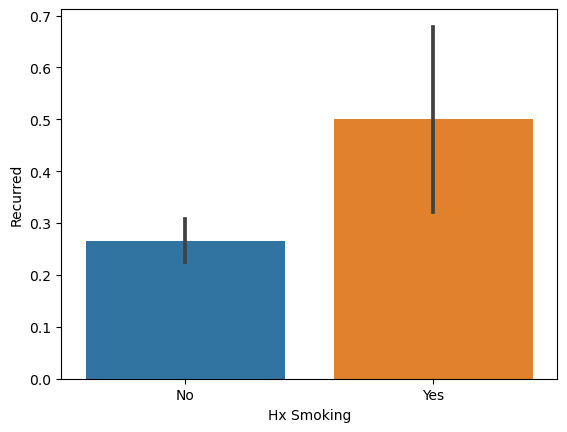

In [907]:
# Hx vs Recurred
sns.barplot(x=df['Hx Smoking'], y= df['Recurred'])


## Encoding Categorical Variables we have:

In [908]:
df.groupby('Recurred').count()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
Recurred,,,,,,,,,,,,,,,,
0,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275
1,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [909]:
# Checking for data types we have
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                 int64
dtype: object

###### Our data set contains object data types, Categorical and a int type as well. We have to convert these labels to numeric (int64) form, so they become machine-readable. This is done through label encoding: 

In [910]:
# Here we define a function to handle our data encoding since we much variable to encode.

# def label_encoder(x):
#     le = LabelEncoder()
#     df[x] = le.fit_transform(df[x])
    
# # Creating a list of our labels we have
# label_list =['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response']

# # looping and encoding are we list we have:
# for i in label_list:
#     label_encoder(i)
    
    
def label_encoder(df, x, encoders):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])
    encoders[x] = le  # Store the fitted encoder in the dictionary

# Creating a list of our labels we have
label_list =['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response']

# Initialize a dictionary to store the LabelEncoder objects
label_encoders = {}

#looping and encoding our list we have:
for i in label_list:
    label_encoder(df, i, label_encoders)
    
#displaying our transform data we have:
df.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


## Split the data

In [911]:
# Here we split the data into training and testing sets

#Dividing out data into independent and dependent variables we have
X=df.drop(['Recurred'], axis=1)
y=df['Recurred']

#Splitting our data into training and testing 
# Dedicating 20% of the data to be testing and 80% for training we have

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train Shape: (306, 16)
X_test Shape: (77, 16)
y_train shape: (306,)
y_test shape: (77,)


## Standardizing Our Data

In [912]:
# Here we carry out feature scaling using the sklearn library StandardScaler.
# Feature scaling
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Implementing Our Classification Models
- We will build 5 different models and compare their accuracy scores

In [913]:
# we create two dictionaries to store the results of our models

result_dic_train = {}
result_dic_test = {}
result_f1_recall ={}
result_confusion = {}

#### Implementing Logistic Regression

###### Overview
Logistic regression is a type of linear Classification algorithm. We used it when our classes are linearly separable and binary- Yes(1) or No (0).

In [914]:
# Model Training
reg = LogisticRegression(random_state=42)
accuracies = cross_val_score(reg, X_train_scale, y_train, cv=5)
reg.fit(X_train_scale, y_train)
y_pred = reg.predict(X_test)


In [915]:
# Model evaluation
l_score = f1_score(y_test, y_pred)
l_recall = recall_score(y_test, y_pred)
l_confusion = confusion_matrix(y_test, y_pred)

#Printing our accuracy we have:
print("Train Score:", np.mean(accuracies))
print('Test Score', reg.score(X_test, y_test))
print('F1 Score', l_score)
print('Recall Score', l_recall)
print('Confusion Matrix', l_confusion)

Train Score: 0.875885774722369
Test Score 0.922077922077922
F1 Score 0.8333333333333334
Recall Score 0.7894736842105263
Confusion Matrix [[56  2]
 [ 4 15]]


In [916]:
#Adding the result in our dictionaries we have:
result_dic_train["Logistic Train Score"]=np.mean(accuracies)
result_dic_test["Logistic Test Score"]=reg.score(X_test, y_test)
result_f1_recall['Logistic Recall']=l_recall

#### Implementing Support Vector Machine

###### Overview
It helps Us define a set of hyper-planes, called decision boundary, that separates the data points into specific classes. The data points closest to the decision boundary are called support vectors. An optimum decision boundary will have a maximum distance from each of the support vectors.

In [917]:
# Model Training
svc = SVC(random_state=42)
accuracies = cross_val_score(svc, X_train_scale, y_train, cv=5)
svc.fit(X_train_scale, y_train)
y1_pred = svc.predict(X_test)


In [918]:
# Model Evaluation
sv_score = f1_score(y_test, y1_pred)
s_recall = recall_score(y_test, y1_pred)
s_confusion = confusion_matrix(y_test, y1_pred)

#Printing our accuracy we have:
print("Train Score:", np.mean(accuracies))
print('Test Score', reg.score(X_test, y_test))
print('F1 Score', sv_score)
print('Recall Score', s_recall)
print('Confusion Matrix', s_confusion)

Train Score: 0.9084611316763617
Test Score 0.922077922077922
F1 Score 0.8888888888888888
Recall Score 0.8421052631578947
Confusion Matrix [[57  1]
 [ 3 16]]


In [919]:
#Adding the result in our dictionaries we have:
result_dic_train["SVM Train Score"]=np.mean(accuracies)
result_dic_test["SVM Test Score"]= reg.score(X_test, y_test)
result_f1_recall['SVM Recall'] = s_recall

#### Implementing K-Nearest Neighbors (KNN)

###### Overview
Our dataset has n-features, KNN represents each data point in an n-dimensional space. It then calculates the distance between the data points. For the unobserved data, we then assigned the label of the nearest observed data points.

In [920]:
# Model Training
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train_scale, y_train, cv=5)
knn.fit(X_train_scale, y_train)
y2_pred = knn.predict(X_test)


In [921]:
# model Evaluation
kn_score = f1_score(y_test, y2_pred)
kn_recall = recall_score(y_test, y2_pred)
kn_confusion = confusion_matrix(y_test, y2_pred)

#Printing our accuracy we have:
print("Train Score:", np.mean(accuracies))
print('Test Score', reg.score(X_test, y_test))
print('F1 Score', kn_score)
print('Recall Score', kn_recall)
print('Confusion Matrix', kn_confusion)

Train Score: 0.9149127445795875
Test Score 0.922077922077922
F1 Score 0.8235294117647058
Recall Score 0.7368421052631579
Confusion Matrix [[57  1]
 [ 5 14]]


In [922]:
#Adding the result in our dictionaries we have:
result_dic_train["KNN Train Score"]=np.mean(accuracies)
result_dic_test["KNN Test Score"]= reg.score(X_test, y_test)
result_f1_recall["KNN Recall"]= kn_recall

#### Implementing Decision Tree

###### Overview
 This algorithm builds “branches” in a hierarchical manner where each branch can be considered as an if-else statement. The branches divide our  dataset into subsets based on the most important features. The “leaves” of our decision tree is where the final classifications happen.

In [923]:
# Model Training 
dtc = DecisionTreeClassifier(random_state=42)
accuracies =cross_val_score(dtc, X_train_scale, y_train, cv=5)
dtc.fit(X_train_scale, y_train)
y3_pred= dtc.predict(X_test)


In [924]:
# Model Evaluation
dt_score = f1_score(y_test, y3_pred)
dt_recall = recall_score(y_test, y3_pred)
dt_confusion = confusion_matrix(y_test, y3_pred)

#Printing our accuracy we have:
print("Train Score:", np.mean(accuracies))
print('Test Score', reg.score(X_test, y_test))
print('F1 Score', dt_score)
print('Recall Score', dt_recall)
print('Confusion Matrix', dt_confusion)

Train Score: 0.9249074563722898
Test Score 0.922077922077922
F1 Score 0.85
Recall Score 0.8947368421052632
Confusion Matrix [[54  4]
 [ 2 17]]


In [925]:
#Adding the result in our dictionaries we have:
result_dic_train["Decision Train Score"]=np.mean(accuracies)
result_dic_test["Decision Test Score"]= reg.score(X_test, y_test)
result_f1_recall["Decision Recall Score"]= dt_recall

#### Implementing Random Forest

###### Overview
Like a forest has trees, a random forest is a collection of decision trees. This classifier aggregates the results from multiple predictors. It additionally utilizes the bagging technique that allows each tree to be trained on a random sampling of the original dataset and takes the majority vote from trees. A random forest classifier has better generalization but is less interpretable than a decision tree classifier, naturally because more layers are added to the model.

In [926]:
# Model Training
rfc = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(rfc, X_train_scale, y_train, cv=5)
rfc.fit(X_train_scale, y_train)
y4_pred = rfc.predict(X_test)



In [927]:
# Model Evaluation
r_score = f1_score(y_test, y4_pred)
r_recall = recall_score(y_test, y4_pred)
r_confusion = confusion_matrix(y_test, y4_pred)

#Printing our accuracy we have:
print("Train Score:", np.mean(accuracies))
print('Test Score', reg.score(X_test, y_test))
print('F1 Score', r_score)
print('Recall Score', r_recall)
print('Confusion Matrix', r_confusion)

Train Score: 0.9542041248016924
Test Score 0.922077922077922
F1 Score 0.9473684210526315
Recall Score 0.9473684210526315
Confusion Matrix [[57  1]
 [ 1 18]]


In [928]:
#Adding the result in our dictionaries we have:
result_dic_train["Random Train Score"]=np.mean(accuracies)
result_dic_test["Random Test Score"]= reg.score(X_test, y_test)
result_f1_recall["Random Recall Score"]= r_recall

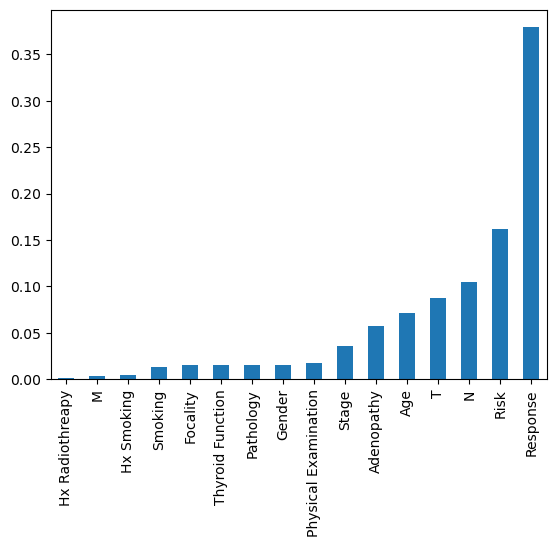

In [929]:
model_ranks=pd.Series(rfc.feature_importances_,index=X_train.columns,name="Importance").sort_values(ascending=True,inplace=False)
ax=model_ranks.plot(kind='bar')

### 4. Model Evaluation:

In [930]:
# Training Score
df_result_train = pd.DataFrame.from_dict(result_dic_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.875886
SVM Train Score,0.908461
KNN Train Score,0.914913
Decision Train Score,0.924907
Random Train Score,0.954204


In [931]:
#Test Scores
df_result_test = pd.DataFrame.from_dict(result_dic_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.922078
SVM Test Score,0.922078
KNN Test Score,0.922078
Decision Test Score,0.922078
Random Test Score,0.922078


In [932]:
#Recall Scores
df_result_recall = pd.DataFrame.from_dict(result_f1_recall,orient = "index",columns=["Score"])
df_result_recall

,Score
Logistic Recall,0.789474
SVM Recall,0.842105
KNN Recall,0.736842
Decision Recall Score,0.894737
Random Recall Score,0.947368


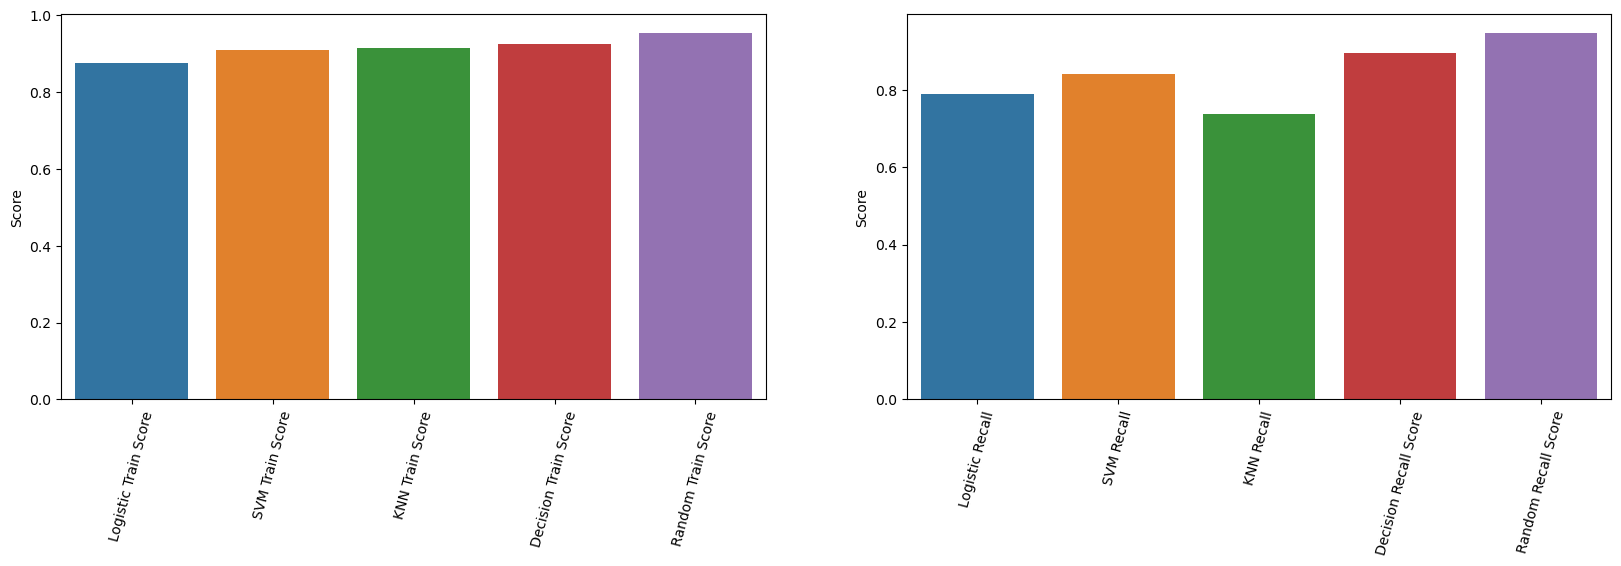

In [933]:
# Visualizing we have:

fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_recall.index,y = df_result_recall.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_recall.index,rotation = 75)
plt.show()

### Model Selection

From the above, it is cleared random forest model out performs the others with a Recall score of about 94.7%. So we will deploy our model using Random Forest.

### Exporting Our Model

In [934]:
import pickle

with open('rfc_model.sav', 'wb') as f:
    pickle.dump(rfc, f)
    
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

## Possible Observation
